In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download('vader_lexicon')  # Ensures you have the latest lexicon

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Mike\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# Load the CSV file
df = pd.read_csv("job_descriptions.csv")

# Display the first few rows
df.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


In [4]:
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the Job Description column
df['sentiment'] = df['Job Description'].apply(lambda text: sia.polarity_scores(text)['compound'])

# View results
print(df[['Job Title', 'Job Description', 'sentiment']].head())

                      Job Title  \
0  Digital Marketing Specialist   
1                 Web Developer   
2            Operations Manager   
3              Network Engineer   
4                 Event Manager   

                                     Job Description  sentiment  
0  Social Media Managers oversee an organizations...     0.7579  
1  Frontend Web Developers design and implement u...     0.4939  
2  Quality Control Managers establish and enforce...     0.0000  
3  Wireless Network Engineers design, implement, ...     0.8658  
4  A Conference Manager coordinates and manages c...     0.3818  


count    1.615940e+06
mean     5.167927e-01
std      2.904848e-01
min     -7.964000e-01
25%      3.612000e-01
50%      5.859000e-01
75%      7.351000e-01
max      9.538000e-01
Name: sentiment, dtype: float64


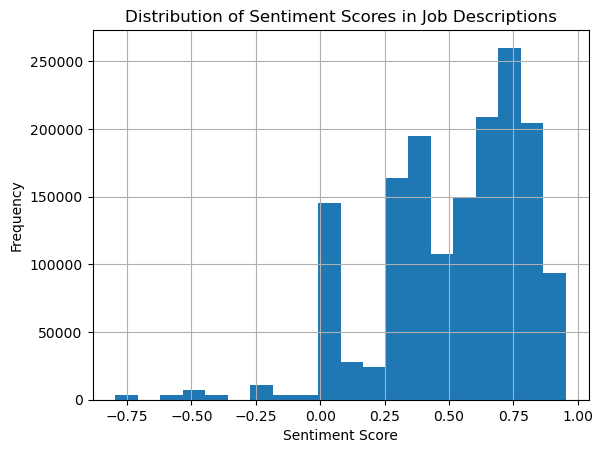

In [5]:
# Summary of sentiment values
print(df['sentiment'].describe())

# Histogram of sentiment distribution
import matplotlib.pyplot as plt
df['sentiment'].hist(bins=20)
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("Distribution of Sentiment Scores in Job Descriptions")
plt.show()

In [7]:
# Group by Work Type and calculate average sentiment
work_type_sentiment = df.groupby("Work Type")["sentiment"].mean().sort_values(ascending=False)

# Display sentiment across different job types
print(work_type_sentiment)

Work Type
Full-Time    0.517368
Temporary    0.517229
Intern       0.516880
Contract     0.516402
Part-Time    0.516088
Name: sentiment, dtype: float64


In [8]:
# Compute average sentiment by country
country_sentiment = df.groupby("Country")["sentiment"].mean().sort_values(ascending=False)

# Top 10 most positive and negative countries
print("Most Positive Countries:")
print(country_sentiment.head(10))

print("\nMost Negative Countries:")
print(country_sentiment.tail(10))

Most Positive Countries:
Country
Maldives                 0.524860
Portugal                 0.524526
Poland                   0.524022
China                    0.523959
French Polynesia         0.523596
Comoros                  0.523327
Virgin Islands (U.S.)    0.522758
Slovak Republic          0.522752
Lao PDR                  0.522704
Estonia                  0.522674
Name: sentiment, dtype: float64

Most Negative Countries:
Country
Argentina       0.511107
Puerto Rico     0.510984
St. Lucia       0.510852
Qatar           0.510572
Bahrain         0.510473
Bhutan          0.509793
Mauritania      0.509497
Algeria         0.509353
Burkina Faso    0.509072
Ghana           0.509055
Name: sentiment, dtype: float64


In [9]:
# Extract minimum and maximum salary as numerical values
df["Min Salary"] = df["Salary Range"].str.extract(r'(\d+)').astype(float)
df["Max Salary"] = df["Salary Range"].str.extract(r'-(\d+)').astype(float)

# Compute the average salary
df["Avg Salary"] = (df["Min Salary"] + df["Max Salary"]) / 2

# Drop rows where salary extraction failed
df = df.dropna(subset=["Avg Salary", "sentiment"])
